# Credit Card Fraud Detection with CNN

It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase. In this notebook, we will compare the different ways we can handle an imbalanced dataset in machine learning.

Most machine learning algorithms work best when the number of samples in each class are about equal. However, with anomaly detection problems, the positive class will always be a small portion of the overall data. For example, in this credit card  dataset, only 0.17% of transactions being classified as fraudulent.

The goal of this notebook is to explore uneven data distributions.

#### Kaggle Competition
https://www.kaggle.com/mlg-ulb/creditcardfraud

#### Data characteristics
- This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. 
- The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.
- It contains only numerical input variables which are the result of a PCA transformation.  Features V1, V2, … V28 are the principal components obtained with PCA.
- Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
- The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 
- Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.
- Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.


#### Credits
This notebook cannot be completed with the helpful notes of the following notebooks and articles:
- [Simple Credit card Fraud Detection 95% Accuracy by Krutarth Darji](https://www.kaggle.com/krutarthhd/simple-credit-card-fraud-detection-95-accuracy)
- [Dealing with Imbalanced Data by Tara Boyle](https://towardsdatascience.com/methods-for-dealing-with-imbalanced-data-5b761be45a18)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import BatchNormalization,Dropout,Dense,Flatten,Conv1D
from tensorflow.keras.optimizers import Adam

In [2]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
f = df[df['Class'] == 1]
nf = df[df['Class'] == 0]

In [14]:
f.shape

(492, 31)

In [11]:
nf.shape

(284315, 31)

## Sample from Positive Classes

Randomly sample 1.5 times number of positive classes to balance the data.

In [18]:
nf = nf.sample(int(f.shape[0] * 1.5))

In [19]:
nf.shape

(738, 31)

In [20]:
data = f.append(nf, ignore_index=True)

In [21]:
data.shape

(1230, 31)

## Train Test Split

This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify. In other words, stratify parameter will preserve the proportion of target as in original dataset, in the train and test datasets as well.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

In [30]:
X = data.drop(['Class'], axis=1)
y = data['Class']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

## Apply StandardScaler

StandardScaler will normalize the features, or transform the data such that its distribution will have a mean value of 0 and a standard deviation of 1 (μ = 0 and σ = 1). 

<img src='img/standard.png' width='300'>

In [35]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [37]:
X_train.shape, X_test.shape

((984, 30), (246, 30))

In [38]:
# reshaping the input to 3D
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [39]:
X_train.shape, X_test.shape

((984, 30, 1), (246, 30, 1))

In [36]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [42]:
y_train.shape, y_test.shape

((984,), (246,))

## Model with CNN

In [43]:
model=Sequential()

model.add(Conv1D(32,2,activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [44]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 29, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 29, 32)            128       
_________________________________________________________________
dropout (Dropout)            (None, 29, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0

## Compiling and Fiting

In [46]:
model.compile(optimizer = Adam(learning_rate=0.0001), 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

In [47]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20, 
                    validation_data=(X_test,y_test))

Epoch 1/20
31/31 [==============================] - 2s 20ms/step - loss: 0.6922 - accuracy: 0.6997 - val_loss: 0.5562 - val_accuracy: 0.9024
Epoch 2/20
31/31 [==============================] - 0s 9ms/step - loss: 0.4365 - accuracy: 0.8523 - val_loss: 0.4896 - val_accuracy: 0.8943
Epoch 3/20
31/31 [==============================] - 0s 9ms/step - loss: 0.3593 - accuracy: 0.8838 - val_loss: 0.4488 - val_accuracy: 0.9228
Epoch 4/20
31/31 [==============================] - 0s 10ms/step - loss: 0.2614 - accuracy: 0.9218 - val_loss: 0.4084 - val_accuracy: 0.9350
Epoch 5/20
31/31 [==============================] - 0s 10ms/step - loss: 0.2464 - accuracy: 0.9096 - val_loss: 0.3750 - val_accuracy: 0.9472
Epoch 6/20
31/31 [==============================] - 0s 11ms/step - loss: 0.2976 - accuracy: 0.9120 - val_loss: 0.3401 - val_accuracy: 0.9350
Epoch 7/20
31/31 [==============================] - 0s 9ms/step - loss: 0.2519 - accuracy: 0.9121 - val_loss: 0.3008 - val_accuracy: 0.9350
Epoch 8/20
31/31

In [48]:
def plotLearningCurve(history,epochs):
  epochRange = range(1, epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

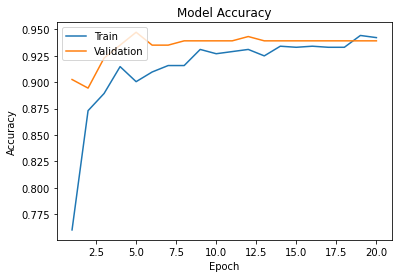

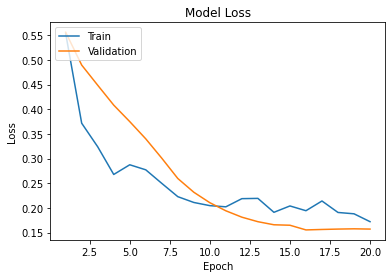

In [49]:
plotLearningCurve(history, 20)